In [15]:
import pandas as pd
from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import concat

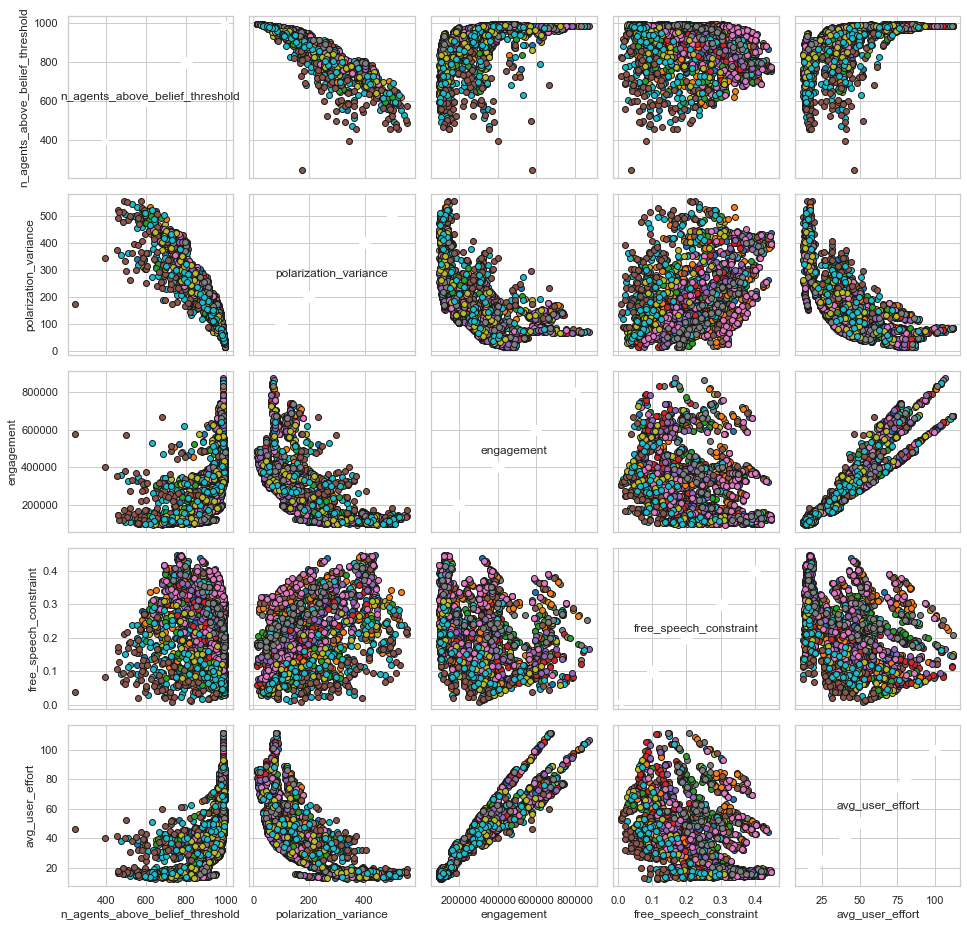

In [4]:
# DEFFUANT
results = load_results('/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_50_policies_DEFFUANT')
exp, out = results

sns.set_style("whitegrid")
fig, axes = pairs_plotting.pairs_scatter(
    exp, out, group_by="policy", legend=False,
)
fig.set_size_inches(16, 16)
plt.show()

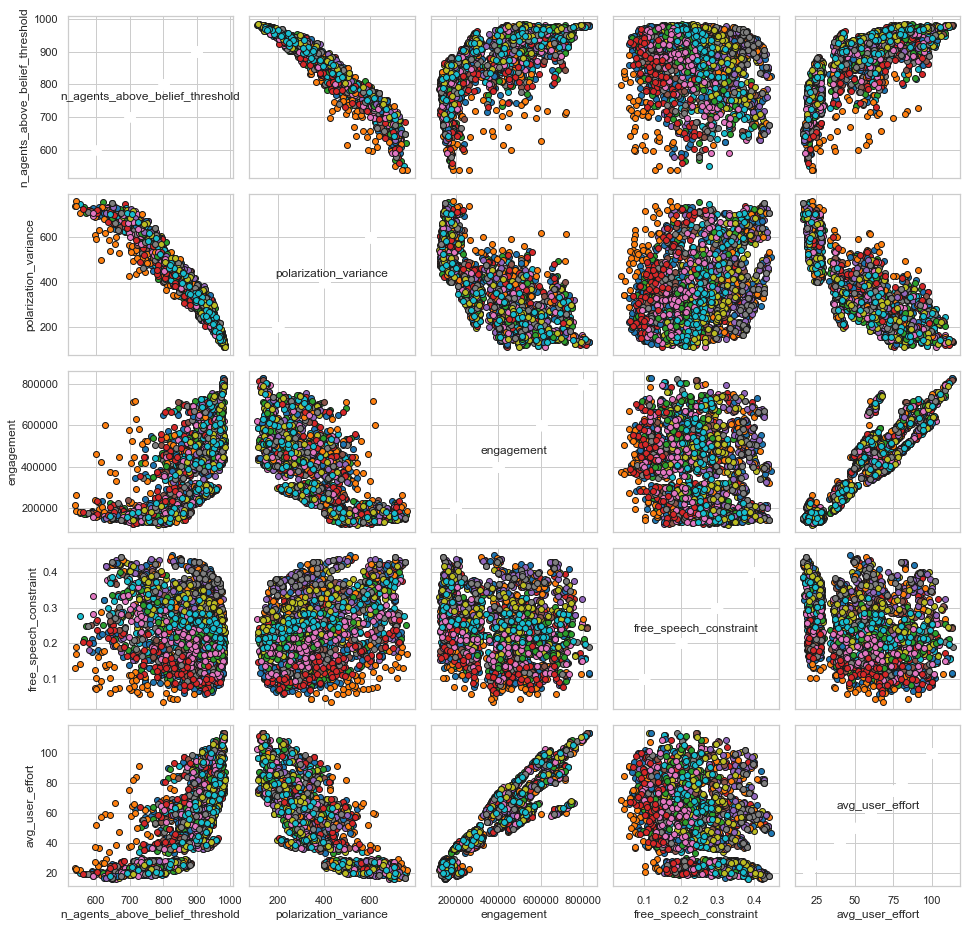

In [7]:
# SAMPLE
results = load_results('/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_50_policies_SAMPLE')
exp, out = results

sns.set_style("whitegrid")
fig, axes = pairs_plotting.pairs_scatter(
    exp, out, group_by="policy", legend=False,
)
fig.set_size_inches(16, 16)
plt.show()

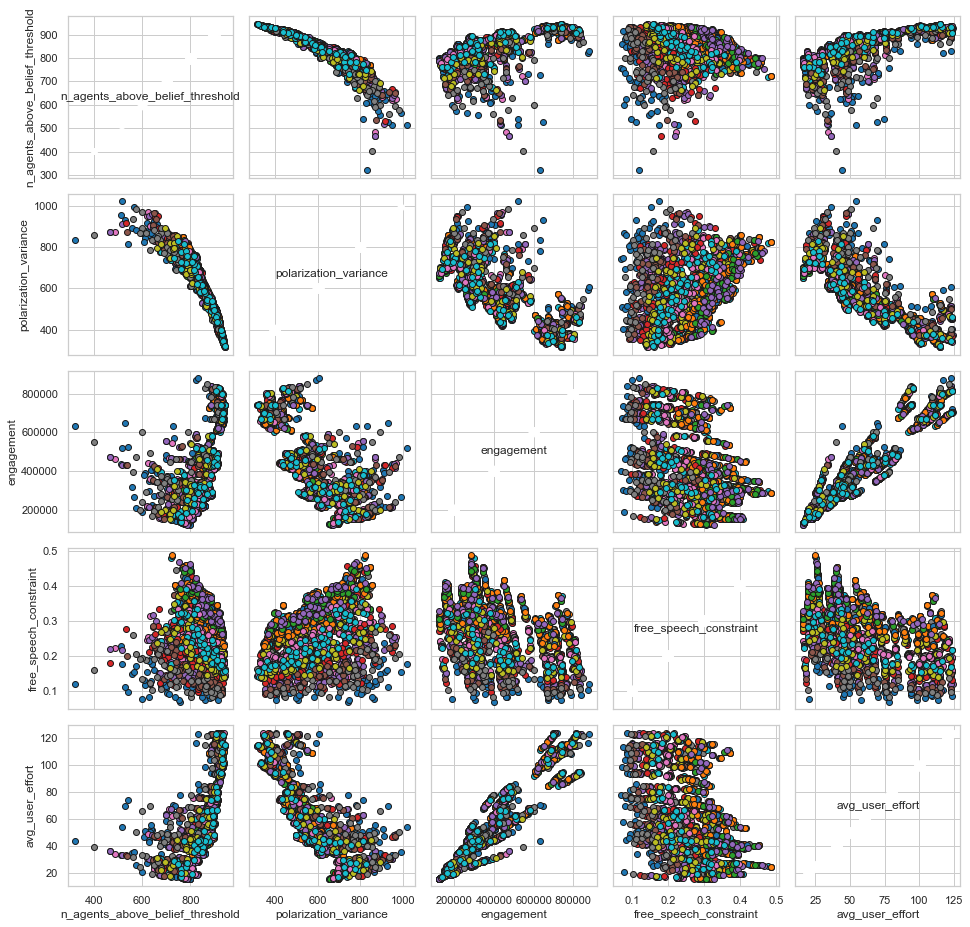

In [8]:
# SIT
results = load_results('/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_50_policies_SIT')
exp, out = results

sns.set_style("whitegrid")
fig, axes = pairs_plotting.pairs_scatter(
    exp, out, group_by="policy", legend=False,
)
fig.set_size_inches(16, 16)
plt.show()

## Compare between the 3 BeliefUpdateFn's
-> Add to each dataframe a column with the belief_update_fn
-> Merging the data from the 3 belief_update_fn's
-> Then plot and color by belief_update_fn


In [11]:
# Loading experiment and outcome data
deffuant_results = load_results('/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_50_policies_DEFFUANT')
deffuant_exp, deffuant_out = def_results

sample_results = load_results('/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_50_policies_SAMPLE')
sample_exp, sample_out = sample_results

sit_results = load_results('/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_50_policies_SIT')
sit_exp, sit_out = results

In [12]:
# Add a column specifying the belief_update_fn that the data stems from
deffuant_exp['belief_update_fn'] = 'deffuant'
sample_exp['belief_update_fn'] = 'sample'
sit_exp['belief_update_fn'] = 'sit'

In [17]:
# Combine experiment data
exp = concat([deffuant_exp, sample_exp, sit_exp])
exp

,belief_metric_threshold,deffuant_mu,high_media_lit,mean_disinformer,mean_normal_user,n_edges,n_posts_estimate_similarity,ratio_normal_user,sampling_p_update,seed,del_t,mlit_select,rank_punish,rank_t,strikes_t,scenario,policy,model,belief_update_fn
0,77,0.021707,0.290077,10,1,3,11,0.988036,0.026456,49114.622278,0,6,4,2,1,150,100,MisinfoPy,deffuant
1,75,0.026232,0.262358,8,1,3,7,0.992769,0.021554,640993.881400,0,6,4,2,1,151,100,MisinfoPy,deffuant
2,79,0.014836,0.298556,9,1,2,14,0.993664,0.015219,746469.687312,0,6,4,2,1,152,100,MisinfoPy,deffuant
3,75,0.024142,0.314807,11,0,2,11,0.984198,0.028143,401396.192625,0,6,4,2,1,153,100,MisinfoPy,deffuant
4,76,0.018014,0.294016,9,2,2,14,0.994278,0.019824,906884.898284,0,6,4,2,1,154,100,MisinfoPy,deffuant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79,0.014025,0.337646,10,2,3,6,0.982190,0.028761,42328.053321,5,6,8,4,1,295,249,MisinfoPy,sit
2496,76,0.014955,0.275233,11,0,2,12,0.993528,0.027331,276456.753772,5,6,8,4,1,296,249,MisinfoPy,sit
2497,80,0.010925,0.272297,11,2,2,11,0.992545,0.011101,317648.530111,5,6,8,4,1,297,249,MisinfoPy,sit
2498,78,0.015301,0.259145,12,2,3,5,0.991197,0.029727,411191.148897,5,6,8,4,1,298,249,MisinfoPy,sit


In [21]:
# Combine outcomes data
deffuant_out = pd.DataFrame(deffuant_out)
sample_out = pd.DataFrame(sample_out)
sit_out = pd.DataFrame(sit_out)

out = concat([deffuant_out, sample_out, sit_out])
out = dict(out)

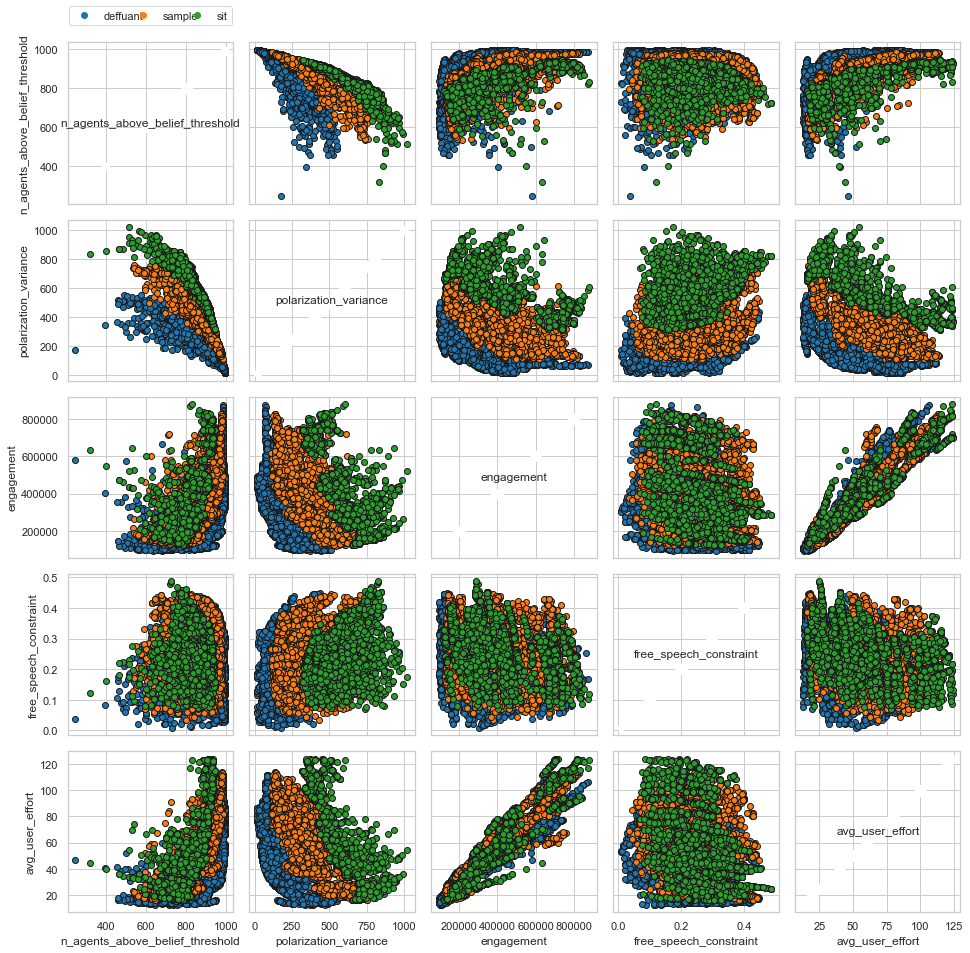

In [22]:

sns.set_style("whitegrid")
fig, axes = pairs_plotting.pairs_scatter(
    exp, out, group_by="belief_update_fn", legend=True,
)
fig.set_size_inches(16, 16)
plt.show()

## Take-Aways
1) For most outcomes, the results of the 3 BeliefUpdateFn's overlap rather a lot
2) For the polarization measure (variance of how people's beliefs are distributed between 0 and 100), there is a clear grouping visible.
3) Higher variance can roughly be equated with higher polarization. SIT tends to have the highest amounts of polarisation, while DEFFUANT tends to have the lowest. Thus: Deffuant < Sample < SIT (amount of polarization)
4) Lower amounts of user effort correlates with higher polarization. This seems to make intuitive sense in situations where agents need to rely on themselves to analyze the veracity of posts